In [1]:
# do the lifelines analysis on checking data

# standard libraries
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import os

# plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# get the datetime library for date & time calcs
from datetime import datetime, timedelta

# lifelines for survival analysis
import lifelines as lf

In [2]:
pd.__version__

'0.18.1'

In [3]:
# load the the main data sets
newData = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/VintageDataChecking.csv")
checkingData = pd.read_csv(newData)

In [4]:
checkingData.head()

,Unnamed: 0,DateOpened,PersonType,PersonCode,Channel,Category,State,End_Date,Observed,CleanCustStart,CustYears,CleanDateClosed,ProductYears,Age,CustomerGroups,Closed
0,337,1980-12-15,F,132789,Branch,CHECKING,PA,2016-12-15,0,1980-12-15,36.024658,NaN,NaN,61.0,Boomers+,0
1,338,1980-12-18,F,132793,Branch,CHECKING,PA,2016-12-15,0,1980-12-18,36.016438,NaN,NaN,85.0,Boomers+,0
2,339,1980-12-26,F,132800,Branch,CHECKING,PA,2016-12-15,0,1980-12-26,35.994521,NaN,NaN,78.0,Boomers+,0
3,340,1980-12-27,F,132894,Branch,CHECKING,PA,2016-12-15,1,1980-12-27,35.991781,2013-08-05,32.627397,50.0,Gen X,1
4,341,1981-01-05,F,132899,Branch,CHECKING,PA,2016-12-15,1,1989-07-11,27.449315,2011-07-07,30.520548,73.0,Boomers+,1


In [40]:
# only need catagories, tenure and observed
# create the reduced dataframe

checkingRed = checkingData[['Channel', 'State', 'CustYears', 'Observed', 'CustomerGroups', 'ProductYears']]

In [6]:
checkingRed.head()

,Channel,State,CustYears,Observed,CustomerGroups,ProductYears
0,Branch,PA,36.024658,0,Boomers+,NaN
1,Branch,PA,36.016438,0,Boomers+,NaN
2,Branch,PA,35.994521,0,Boomers+,NaN
3,Branch,PA,35.991781,1,Gen X,32.627397
4,Branch,PA,27.449315,1,Boomers+,30.520548


In [7]:
checkingRed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1378745 entries, 0 to 1378744
Data columns (total 6 columns):
Channel           1378745 non-null object
State             1316345 non-null object
CustYears         1324552 non-null float64
Observed          1378745 non-null int64
CustomerGroups    1374945 non-null object
ProductYears      471238 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 63.1+ MB


In [8]:
# get the counts of the customers in each group

checkingRed.groupby(['Channel', 'CustomerGroups']).agg({'CustomerGroups' : pd.Series.count})

CustomerGroups
Channel     CustomerGroups                
Branch      Boomers+                586914
            Gen X                   296013
            Gen Z                    55134
            Millennials             210966
            Students                176479
OnlinePhone Boomers+                 10490
            Gen X                    16546
            Gen Z                      112
            Millennials              17057
            Students                  5234

In [9]:
# write the cleaned CSV

#os.getcwd()

# export the clean data

# checkingRed.to_csv('CheckingSurvivalData.csv')

In [10]:
#first try the KaplainMeierFitter
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter()

In [11]:
T = checkingRed["CustYears"]
C = checkingData["Observed"]

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1378745 observations, 904219 censored>

(0, 10)

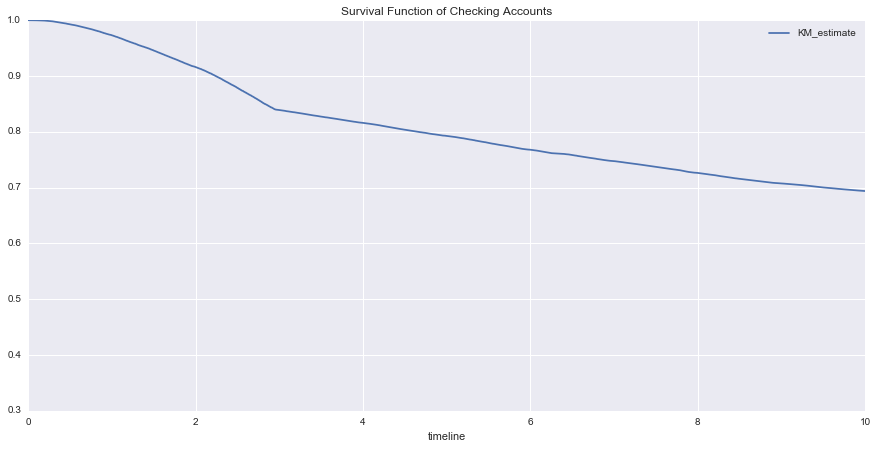

In [12]:
kmf.survival_function_.plot(figsize = (15,7))
plt.title('Survival Function of Checking Accounts')
plt.xlim([0, 10])

In [13]:
T = checkingRed["ProductYears"]
C = checkingData["Observed"]

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1378745 observations, 904219 censored>

(0, 5)

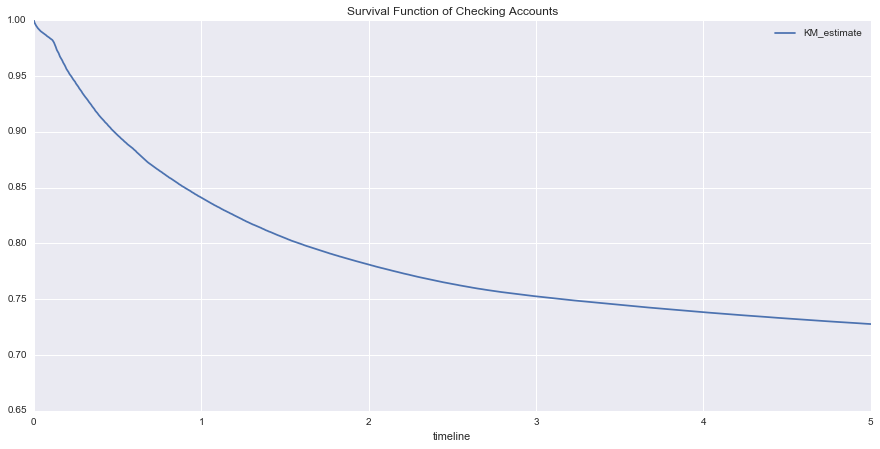

In [14]:
kmf.survival_function_.plot(figsize = (15,7))
plt.title('Survival Function of Checking Accounts')
plt.xlim([0, 5])

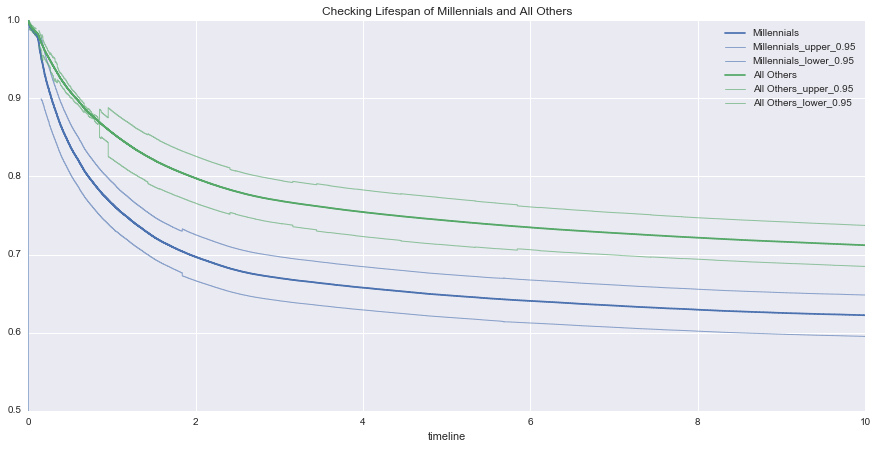

In [15]:
ax = plt.subplot(111)

customers = (checkingRed['CustomerGroups'] == "Millennials")
kmf.fit(T[customers], event_observed = C[customers], label = 'Millennials')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~customers], event_observed = C[~customers], label = 'All Others')
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0.5,1)
plt.xlim(0,10)
plt.title("Checking Lifespan of Millennials and All Others")

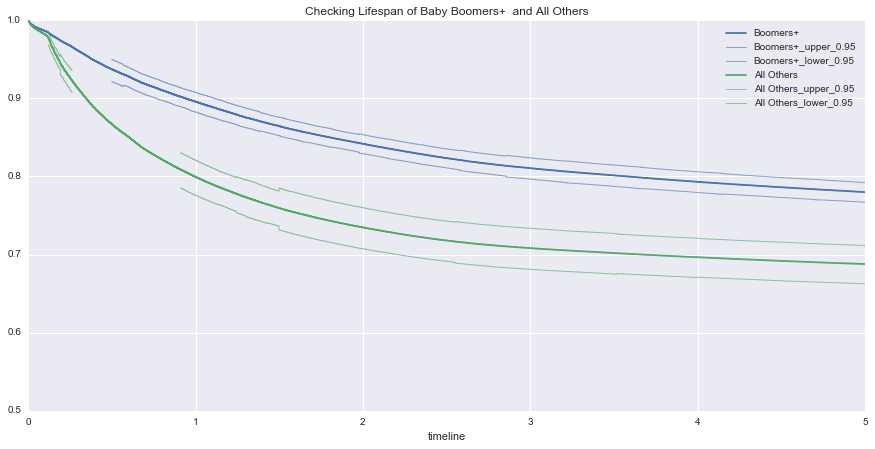

In [16]:
ax = plt.subplot(111)

customers = (checkingRed['CustomerGroups'] == "Boomers+")
kmf.fit(T[customers], event_observed = C[customers], label = 'Boomers+')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~customers], event_observed = C[~customers], label = 'All Others')
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0.5,1)
plt.xlim(0,5)
plt.title("Checking Lifespan of Baby Boomers+  and All Others")

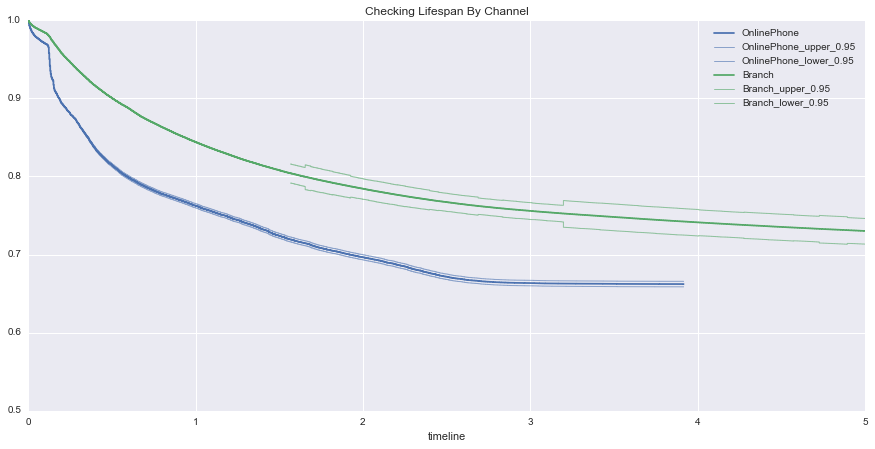

In [17]:
ax = plt.subplot(111)

customer_channel = (checkingRed['Channel'] == "OnlinePhone")
kmf.fit(T[customer_channel], event_observed = C[customer_channel], label = 'OnlinePhone')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~customer_channel], event_observed = C[~customer_channel], label = 'Branch')
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0.5,1)
plt.xlim(0,5)
plt.title("Checking Lifespan By Channel")

In [18]:
# need to remove the nan from the index to get it to plot properly

generations = []
generations.append(checkingRed['CustomerGroups'].unique())

print(generations)

[array(['Boomers+', 'Gen X', 'Millennials', 'Students', 'Gen Z', nan], dtype=object)]


In [19]:
# get the count of generations by channel

checkingRed.groupby(['Channel', 'CustomerGroups']).agg({'CustomerGroups' : pd.Series.count})

CustomerGroups
Channel     CustomerGroups                
Branch      Boomers+                586914
            Gen X                   296013
            Gen Z                    55134
            Millennials             210966
            Students                176479
OnlinePhone Boomers+                 10490
            Gen X                    16546
            Gen Z                      112
            Millennials              17057
            Students                  5234

In [20]:
# get a count of the nulls in the CustomerGroups date
#  nulls

checkingRed['CustomerGroups'].isnull().sum()

3800

In [21]:
# the presence of nan in the data causes problems

checkingRed['CustomerGroups'].unique()

array(['Boomers+', 'Gen X', 'Millennials', 'Students', 'Gen Z', nan], dtype=object)

In [38]:
# Does not work

# use this method to drop NA
# df = df.drop(df[df.score < 50].index)

# checkingRed = checkingRed.drop(checkingRed[checkingRed.Channel == 'Branch'].index)

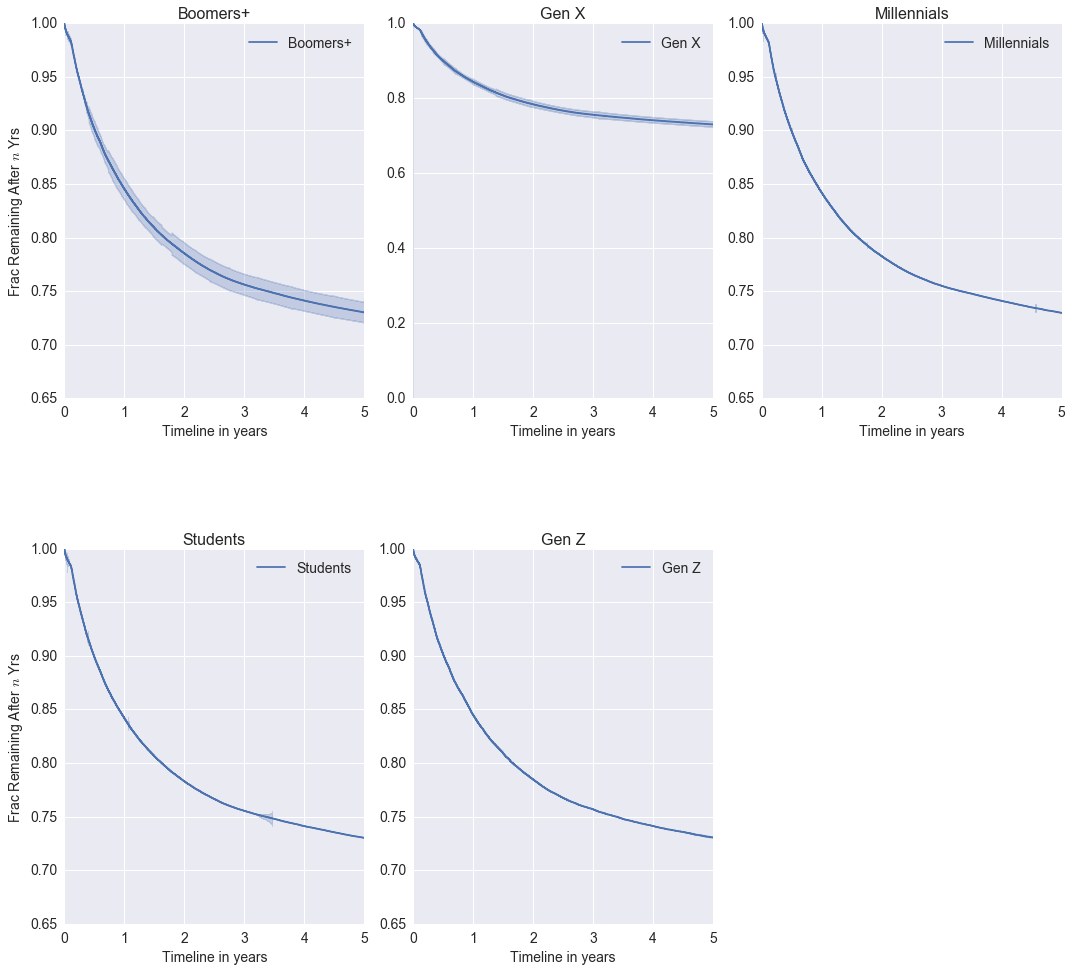

In [151]:
generations = ['Boomers+', 'Gen X', 'Millennials', 'Students', 'Gen Z']

fig = plt.figure(figsize = (15,15))

for i,generations in enumerate(generations):
    ax = plt.subplot(2,3,i+1)
    ix = checkingRed['CustomerGroups'] == generations
    
    kmf.fit(T[ix], C[ix], label=generations)
    
    
    kmf.plot(ax=ax, legend=False)
    plt.title(generations, size = 16)
    plt.xlabel('Timeline in years', size = 14)
    plt.legend(loc=1,prop={'size':14})
    plt.xlim(0,5)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    if  i ==0:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
    if  i ==3:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
        
fig.tight_layout()
#fig.suptitle('Survivability of Checking Accts By Generation', size = 16)
fig.subplots_adjust(top=0.88, hspace = .4)
plt.show()

In [23]:
# check for nulls in the channel

checkingRed['Channel'].isnull().sum()

0

In [24]:
grouped = checkingRed.groupby(['Channel', 'State'])

grouped.agg('count')

CustYears  \
Channel     State                                                           
Branch      ***********************************************...        102   
            AE                                                         10   
            AK                                                         22   
            AL                                                        135   
            AP                                                          4   
            AR                                                         50   
            AZ                                                        467   
            CA                                                       1750   
            CO                                                        335   
            CT                                                      46058   
            DC                                                        235   
            DE                                                       2434   
            FL                                                       6366   
            GA                                                        766   
            GU                                                          1   
            HI                                                         67   
            IA                                                         54   
            ID                                                         37   
            IL                                                        374   
            IN                                                        152   
            KS                                                         70   
            KY                                                        131   
            LA                                                        121   
            MA                                                     392008   
            MD                                                       4827   
            ME                                                        697   
            MI                                                        289   
            MN                                                        161   
            MO                                                        115   
            MP                                                          1   
...                                                                   ...   
OnlinePhone MI                                                        206   
            MN                                                        163   
            MO                                                        139   
            MS                                                         41   
            MT                                                         22   
            NC                                                        311   
            ND                                                          6   
            NE                                                         32   
            NH                                                       1049   
            NJ                                                       7912   
            NM                                                         23   
            NV                                                         81   
            NY                                                       6437   
            OH                                                        300   
            OK                                                         55   
            OR                                                        125   
            PA                                                       8317   
            PR                                                         10   
            RI                                                       2432   
            SC                                              

In [120]:
# load the the online and branch data sets
newData = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/online.csv")
online = pd.read_csv(newData)

newData2 = os.path.normpath("C:/Users/n846490/Documents/Python Scripts/SurvivalAnalysis/branch.csv")
branch = pd.read_csv(newData2)

In [121]:
online.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49447 entries, 0 to 49446
Data columns (total 6 columns):
Channel           49447 non-null object
State             49416 non-null object
CustYears         48608 non-null float64
Observed          49447 non-null int64
CustomerGroups    49439 non-null object
ProductYears      16702 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.3+ MB


In [134]:
T = online["ProductYears"]
C = online["Observed"]

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 49447 observations, 32745 censored>

(0, 5)

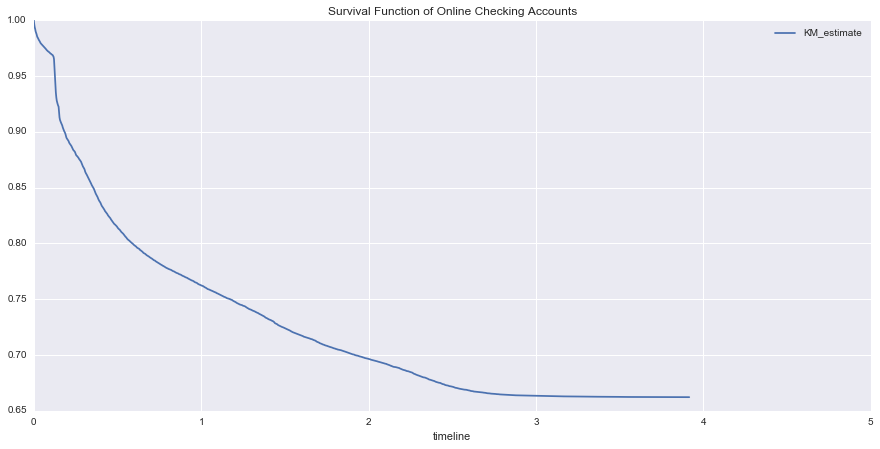

In [135]:
kmf.survival_function_.plot(figsize = (15,7))
plt.title('Survival Function of Online Checking Accounts')
plt.xlim([0, 5])

(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 7 Text yticklabel objects>)

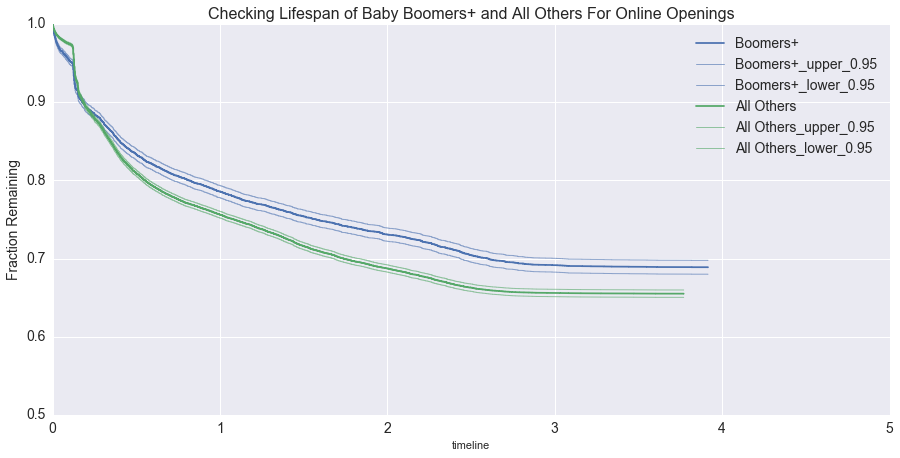

In [144]:
ax = plt.subplot(111)

customers = (online['CustomerGroups'] == "Boomers+")
kmf.fit(T[customers], event_observed = C[customers], label = 'Boomers+')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~customers], event_observed = C[~customers], label = 'All Others')
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0.5,1)
plt.xlim(0,5)
plt.title("Checking Lifespan of Baby Boomers+ and All Others For Online Openings", size = 16)
plt.legend(loc=1,prop={'size':14})
plt.xticks(fontsize = 14)
plt.ylabel("Fraction Remaining", fontsize = 14)
plt.yticks(fontsize = 14)

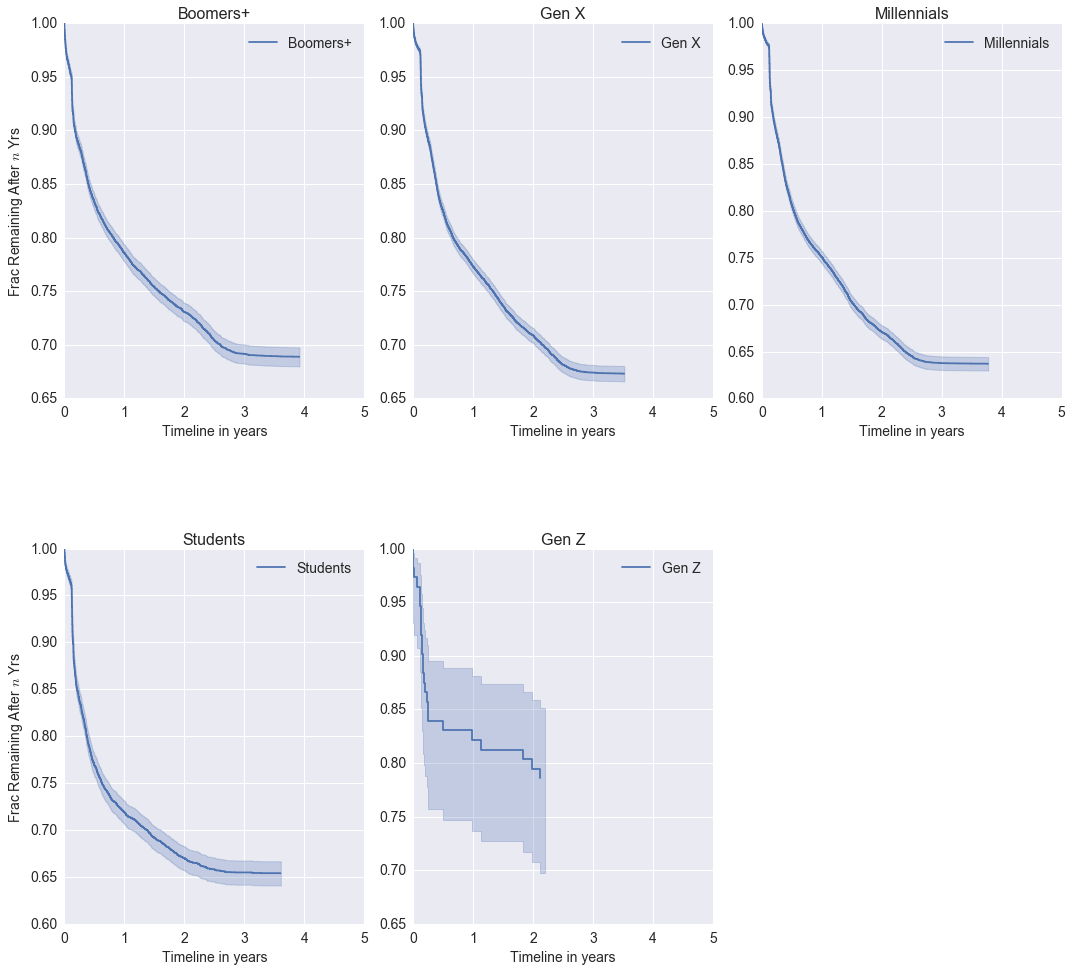

In [146]:
#############  PLOT OF THE ONLINE GENERATIONS   #####################

generations = ['Boomers+', 'Gen X', 'Millennials', 'Students', 'Gen Z']

fig = plt.figure(figsize = (15,15))

for i,generations in enumerate(generations):
    ax = plt.subplot(2,3,i+1)
    ix = online['CustomerGroups'] == generations
    
    kmf.fit(T[ix], C[ix], label=generations)
    
    
    kmf.plot(ax=ax, legend=False)
    plt.title(generations, size = 16)
    plt.xlabel('Timeline in years', size = 14)
    plt.legend(loc=1,prop={'size':14})
    plt.xlim(0,5)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    if  i ==0:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
    if  i ==3:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
        
fig.tight_layout()
#fig.suptitle('Survivability of Checking Accts By Generation', size = 16)
fig.subplots_adjust(top=0.88, hspace = .4)
plt.show()

In [147]:
T = branch["ProductYears"]
C = branch["Observed"]

kmf.fit(T, event_observed=C)

<lifelines.KaplanMeierFitter: fitted with 1329298 observations, 871474 censored>

(0, 5)

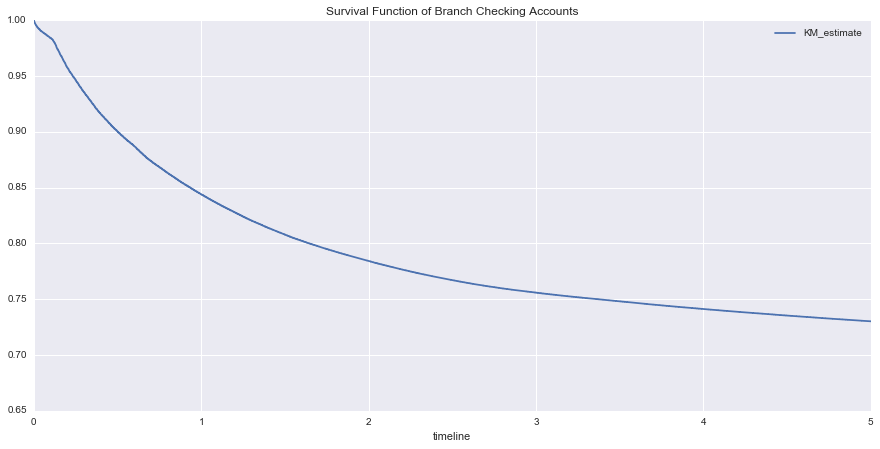

In [148]:
kmf.survival_function_.plot(figsize = (15,7))
plt.title('Survival Function of Branch Checking Accounts')
plt.xlim([0, 5])

(array([ 0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 7 Text yticklabel objects>)

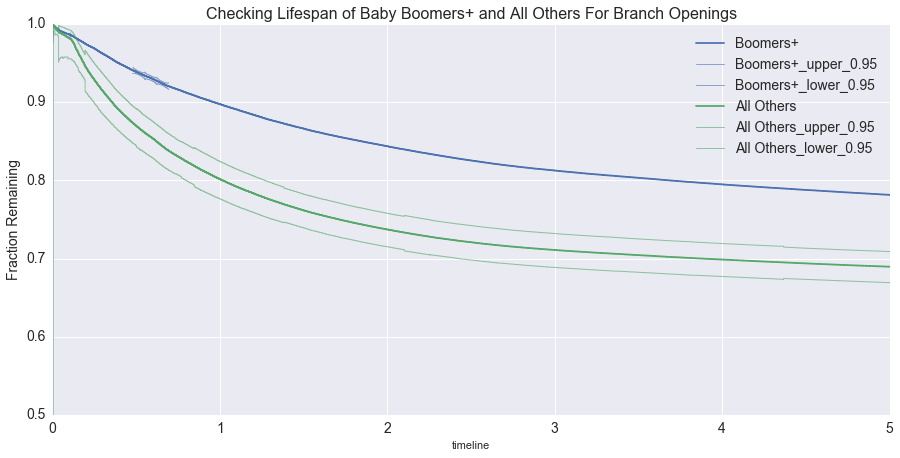

In [149]:
ax = plt.subplot(111)

customers = (branch['CustomerGroups'] == "Boomers+")
kmf.fit(T[customers], event_observed = C[customers], label = 'Boomers+')
kmf.plot(ax = ax, ci_force_lines = True)
kmf.fit(T[~customers], event_observed = C[~customers], label = 'All Others')
kmf.plot(ax = ax, ci_force_lines=True, figsize = (15,7))

plt.ylim(0.5,1)
plt.xlim(0,5)
plt.title("Checking Lifespan of Baby Boomers+ and All Others For Branch Openings", size = 16)
plt.legend(loc=1,prop={'size':14})
plt.xticks(fontsize = 14)
plt.ylabel("Fraction Remaining", fontsize = 14)
plt.yticks(fontsize = 14)

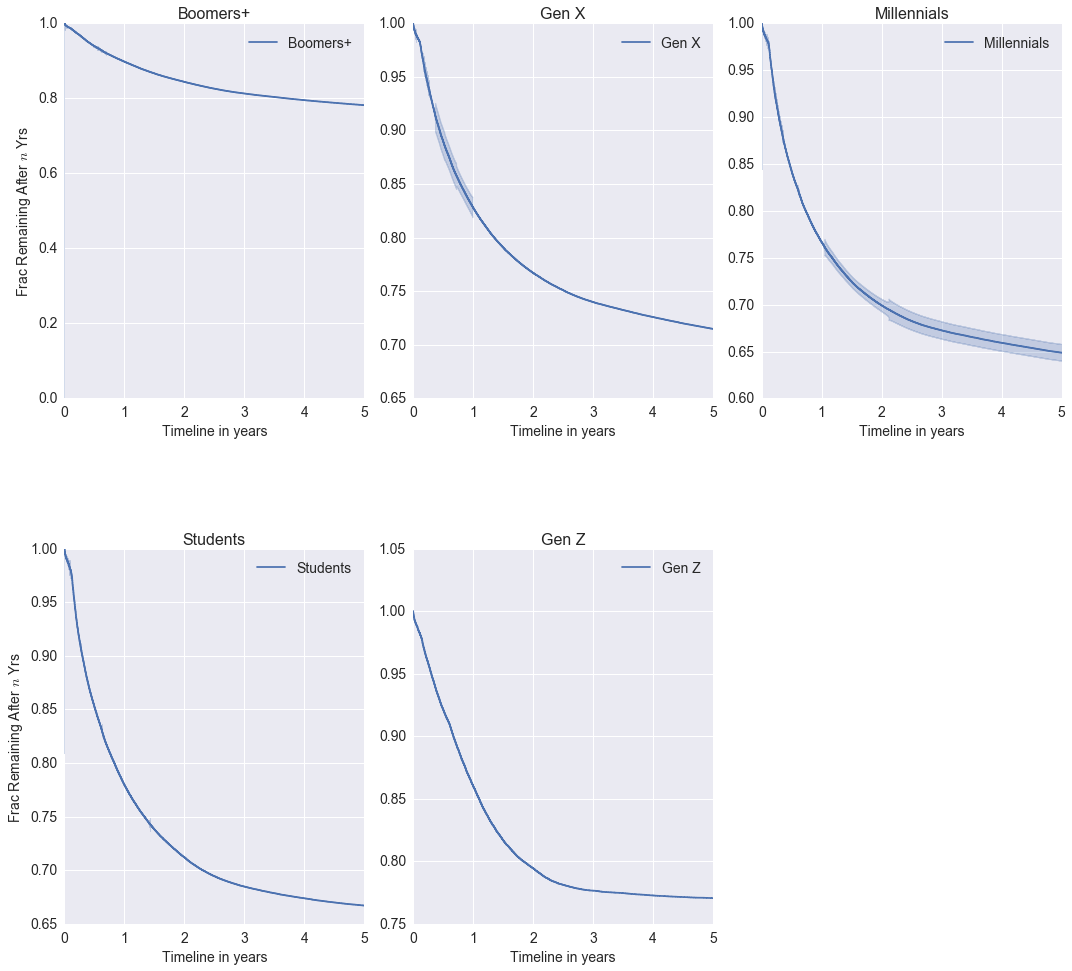

In [150]:
#############  PLOT OF THE BRANCH GENERATIONS   #####################

generations = ['Boomers+', 'Gen X', 'Millennials', 'Students', 'Gen Z']

fig = plt.figure(figsize = (15,15))

for i,generations in enumerate(generations):
    ax = plt.subplot(2,3,i+1)
    ix = branch['CustomerGroups'] == generations
    
    kmf.fit(T[ix], C[ix], label=generations)
    
    
    kmf.plot(ax=ax, legend=False)
    plt.title(generations, size = 16)
    plt.xlabel('Timeline in years', size = 14)
    plt.legend(loc=1,prop={'size':14})
    plt.xlim(0,5)
    plt.yticks(fontsize = 14)
    plt.xticks(fontsize = 14)
    if  i ==0:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
    if  i ==3:
        plt.ylabel('Frac Remaining After $n$ Yrs', size = 14)
        
fig.tight_layout()
#fig.suptitle('Survivability of Checking Accts By Generation', size = 16)
fig.subplots_adjust(top=0.88, hspace = .4)
plt.show()